In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
with open('./config.json', 'r') as fp:
    config = json.load(fp)

In [3]:
label_score_path = config['label_score_path']

In [4]:
df = pd.read_csv(label_score_path)

In [5]:
df

,cow_regno,bcs,center_x,center_y,center_z
0,500991129,2,3.034565e-15,-6.477803e-17,6.279123e-15
1,501034812,6,-3.640540e-15,1.784004e-16,-6.575080e-15
2,501049585,4,-3.093918e-16,-1.235133e-16,1.481373e-14
3,501049591,6,1.652057e-15,8.045727e-17,5.538417e-15
4,501051848,6,-1.594874e-15,-3.984945e-17,-3.381800e-15
...,...,...,...,...,...
398,501459358,5,3.732140e-15,-5.775412e-17,4.745069e-16
399,501459505,5,-1.037754e-15,9.051805e-16,3.923908e-16
400,501467130,5,2.767973e-15,8.623108e-16,1.875865e-15
401,501473986,5,-2.035976e-15,-1.074333e-16,-3.442861e-16


In [6]:
dftrain, dftest = train_test_split(df, test_size=0.1,
                                    # stratify=df[['bcs']]
                                    )

In [24]:
df['bcs'].value_counts()

5    184
6    116
4     58
7     30
3      9
2      3
1      2
8      1
Name: bcs, dtype: int64

<AxesSubplot:ylabel='Frequency'>

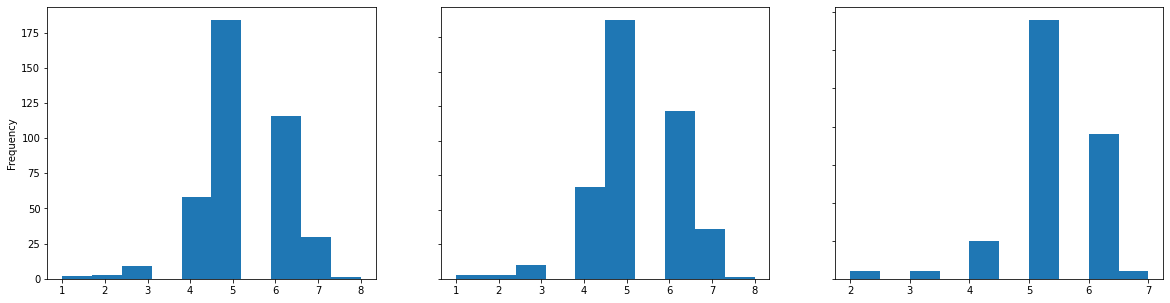

In [41]:
dftrain, dftest = train_test_split(df, test_size=0.15)
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
df['bcs'].plot(kind='hist', bins=10, sharey=ax1)
ax2 = plt.subplot(1, 3, 2)
dftrain['bcs'].plot(kind='hist', bins=10)
ax3 = plt.subplot(1, 3, 3)
dftest['bcs'].plot(kind='hist', bins=10, sharey=ax1)

In [42]:
dftrain['type'] = 'train'
dftest['type'] = 'test'
df = pd.concat([dftrain, dftest], ignore_index=True)
df.to_csv(label_score_path, index=False)